# Modeling and Simulation in Python

Chapter 15

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### The coffee cooling problem

I'll use a `State` object to store the initial temperature.


In [2]:
init = State(T=90)

,values
T,90


And a `System` object to contain the system parameters.

In [3]:
coffee = System(init=init,
                volume=300,
                r=0.01,
                T_env=22,
                t_0=0,
                t_end=30,
                dt=1)

,values
init,T 90 dtype: int64
volume,300
r,0.01
T_env,22
t_0,0
t_end,30
dt,1


The update function implements Newton's law of cooling.

In [4]:
def update_func(state, t, system):
    """Update the thermal transfer model.
    
    state: State (temp)
    t: time
    system: System object
    
    returns: State (temp)
    """
    r, T_env, dt = system.r, system.T_env, system.dt
    
    T = state.T
    T += -r * (T - T_env) * dt
    
    return State(T=T)

Here's how it works.

In [5]:
update_func(init, 0, coffee)

,values
T,89.32


Here's a version of `run_simulation` that uses `linrange` to make an array of time steps.

In [6]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
    
    Add a TimeFrame to the System: results
    
    system: System object
    update_func: function that updates state
    """
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts = linrange(t_0, t_end, dt)
    
    for t in ts:
        frame.row[t+dt] = update_func(frame.row[t], t, system)
    
    return frame

And here's how it works.

In [7]:
results = run_simulation(coffee, update_func)

,T
0,90
1,89.32
2,88.6468
3,87.9803
4,87.3205
5,86.6673
6,86.0207
7,85.3804
8,84.7466
9,84.1192


Here's what the results look like.

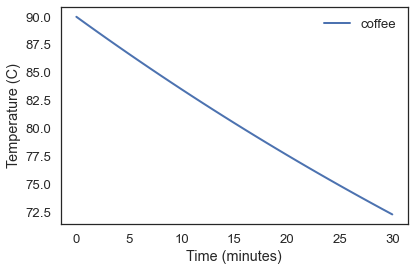

In [8]:
plot(results.T, label='coffee')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

And here's the final temperature:

In [9]:
coffee.T_final = get_last_value(results.T)
T_final = get_last_value(results.T)

72.2996253904031

## Encapsulation

Before we go on, let's define a function to initialize `System` objects with relevant parameters:

In [10]:
def make_system(T_init, r, volume, t_end):
    """Makes a System object with the given parameters.

    T_init: initial temperature in degC
    r: heat transfer rate, in 1/min
    volume: volume of liquid in mL
    t_end: end time of simulation
    
    returns: System object
    """
    init = State(T=T_init)
                   
    return System(init=init,
                  r=r, 
                  volume=volume,
                  temp=T_init,
                  t_0=0, 
                  t_end=t_end, 
                  dt=1,
                  T_env=22)

Here's how we use it:

In [11]:
coffee = make_system(T_init=90, r=0.01, volume=300, t_end=30)
results = run_simulation(coffee, update_func)
T_final = get_last_value(results.T)

72.2996253904031

## Exercises

**Exercise:**  Simulate the temperature of 50 mL of milk with a starting temperature of 5 degC, in a vessel with the same insulation, for 15 minutes, and plot the results.

By trial and error, find a value for `r` that makes the final temperature close to 20 C.

In [12]:
# Solution goes here
milk = make_system(T_init=5, r=0.01, volume=50, t_end=15)
results = run_simulation(milk, update_func)

,T
0,5
1,5.17
2,5.3383
3,5.50492
4,5.66987
5,5.83317
6,5.99484
7,6.15489
8,6.31334
9,6.47021


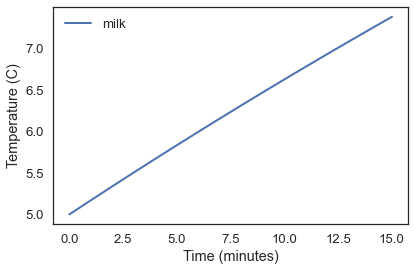

In [13]:
plot(results.T, label='milk')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')

In [18]:
#First let's sweep and see which r gets us close to 20 
for  i in linspace(.01,1,100):
    milk = make_system(T_init=5, r=i, volume=50, t_end=15)
    results = run_simulation(milk, update_func)
    T_final = get_last_value(results.T)
    print(i,T_final)


0.01 7.379007971098095
0.02 9.444325255028133
0.03 11.234729784674581
0.04 12.784531542364547
0.05 14.124049087284192
0.060000000000000005 15.280039421085409
0.06999999999999999 16.276085345122556
0.08 17.132944130806518
0.09 17.86886101606212
0.09999999999999999 18.499850754390966
0.11 19.039950177213015
0.12 19.501444483698084
0.13 19.895069743979544
0.14 20.23019389031005
0.15000000000000002 20.51497827527872
0.16 20.75652169562375
0.17 20.960988613467283
0.18000000000000002 21.133723153044073
0.19 21.279350309321327
0.2 21.40186567448986
0.21000000000000002 21.504714868371725
0.22 21.590863748605237
0.23 21.662860375347844
0.24000000000000002 21.72288961253363
0.25 21.772821162827313
0.26 21.814251755759834
0.27 21.848542137576676
0.28 21.87684944657605
0.29000000000000004 21.900155498690445
0.3 21.91929145433097
0.31 21.934959288657772
0.32 21.947750443077407
0.33 21.95816199553946
0.34 21.966610650776186
0.35000000000000003 21.97344481868776
0.36000000000000004 21.978955019332147

Looks like r=.13-.17 is our range--let's make a modified sweep

In [20]:
for  i in linspace(.13,.18,100):
    milk = make_system(T_init=5, r=i, volume=50, t_end=15)
    results = run_simulation(milk, update_func)
    T_final = get_last_value(results.T)
    print(i,T_final)

0.13 19.895069743979544
0.1305050505050505 19.91332469076865
0.13101010101010102 19.93143179088039
0.13151515151515153 19.94939215683875
0.13202020202020204 19.96720689343565
0.13252525252525252 19.984877097780213
0.13303030303030303 20.002403859347744
0.13353535353535353 20.019788260028495
0.13404040404040404 20.037031374176063
0.13454545454545455 20.05413426865556
0.13505050505050506 20.071098002891482
0.13555555555555557 20.087923628915316
0.13606060606060608 20.10461219141286
0.13656565656565656 20.121164727771234
0.13707070707070707 20.137582268125694
0.13757575757575757 20.15386583540611
0.13808080808080808 20.170016445383173
0.1385858585858586 20.18603510671439
0.1390909090909091 20.20192282098974
0.1395959595959596 20.217680582777113
0.14010101010101011 20.23330937966745
0.1406060606060606 20.248810192319645
0.1411111111111111 20.264183994505178
0.1416161616161616 20.27943175315247
0.14212121212121212 20.29455442839099
0.14262626262626263 20.309552973595125
0.14313131313131314 

Looks like r=0.13303030303030303  is what we want!

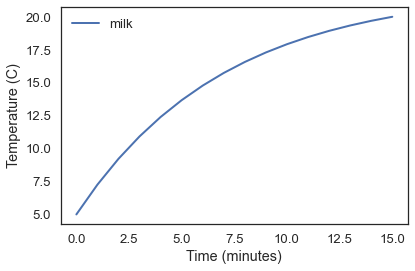

In [22]:
milk = make_system(T_init=5, r=0.1330303, volume=50, t_end=15)
results = run_simulation(milk, update_func)
plot(results.T, label='milk')
decorate(xlabel='Time (minutes)',
         ylabel='Temperature (C)')